<a href="https://colab.research.google.com/github/HarduinLearnsCoding/HarduinSolvesLaboratoryProblems/blob/main/PCAandBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

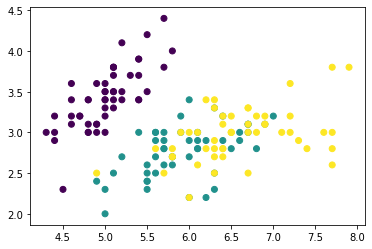

In [ ]:
import numpy as np    
import scipy as sp
from sklearn import datasets
import math
import matplotlib.pyplot as plt
iris=datasets.load_iris()
x=iris.data[:,:2]
y=iris.target
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [ ]:
vector=np.array([[1/math.sqrt(2),1/math.sqrt(2)]])
dotproduct=np.matmul(x,np.transpose(vector))
dotproduct.reshape(dotproduct.shape[0],1)
print(dotproduct.shape)

(150, 1)


In [ ]:
projection=np.matmul(dotproduct,vector)
print(projection[:10,:])

[[4.3  4.3 ]
 [3.95 3.95]
 [3.95 3.95]
 [3.85 3.85]
 [4.3  4.3 ]
 [4.65 4.65]
 [4.   4.  ]
 [4.2  4.2 ]
 [3.65 3.65]
 [4.   4.  ]]


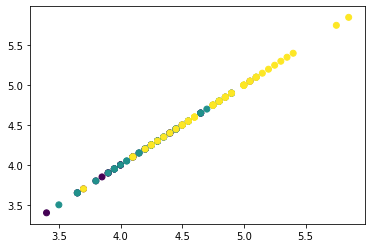

In [ ]:
plt.scatter(projection[:,0],projection[:,1],c=y)
plt.show()

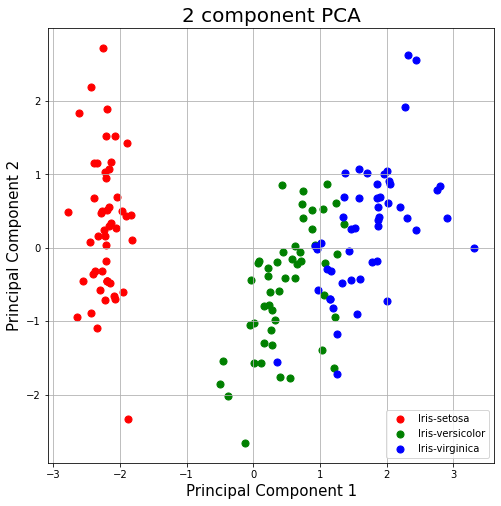

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()